### Ejercicio 1: Preprocesamiento

- Grafique el comportamiento distributivo de los atributos y de la variable dependiente. Reporte brevemente el comportamiento de las variables.

- En  base al  comportamiento de  los  atributos,  considere si  es  necesario implementar  alguna recodificación o transformación de atributo. Algunas normas a seguir:
   - Para las variables categóricas, recodifíquelas en variables binarias.
   - Para aquellas variables numéricas que presenten alto sesgo, pueden transformarlas con logaritmo.

In [1]:
#importamos las librerias basicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
#importamos los datasets
df_train = pd.read_csv('churn_train.csv').drop('Unnamed: 0', axis=1)
df_test = pd.read_csv('churn_test.csv').drop('Unnamed: 0', axis=1)

In [3]:
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [4]:
#inspeccionamos el tipo de variables del dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
state                            3333 non-null object
account_length                   3333 non-null int64
area_code                        3333 non-null object
international_plan               3333 non-null object
voice_mail_plan                  3333 non-null object
number_vmail_messages            3333 non-null int64
total_day_minutes                3333 non-null float64
total_day_calls                  3333 non-null int64
total_day_charge                 3333 non-null float64
total_eve_minutes                3333 non-null float64
total_eve_calls                  3333 non-null int64
total_eve_charge                 3333 non-null float64
total_night_minutes              3333 non-null float64
total_night_calls                3333 non-null int64
total_night_charge               3333 non-null float64
total_intl_minutes               3333 non-null float64
total_intl_calls           

In [5]:
#Inspeccionamos valores nulos
df_train.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

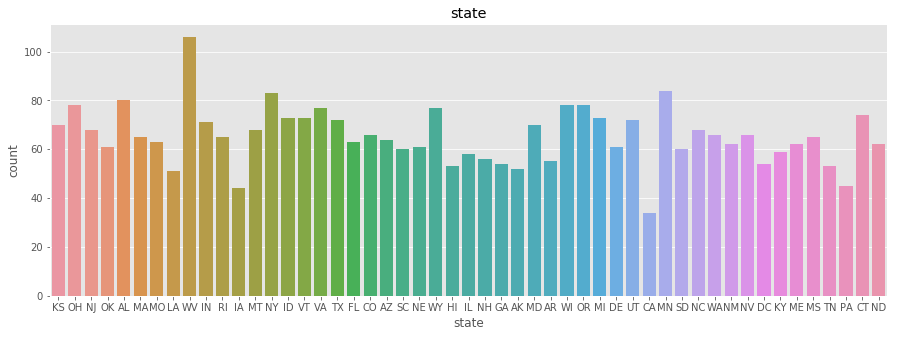

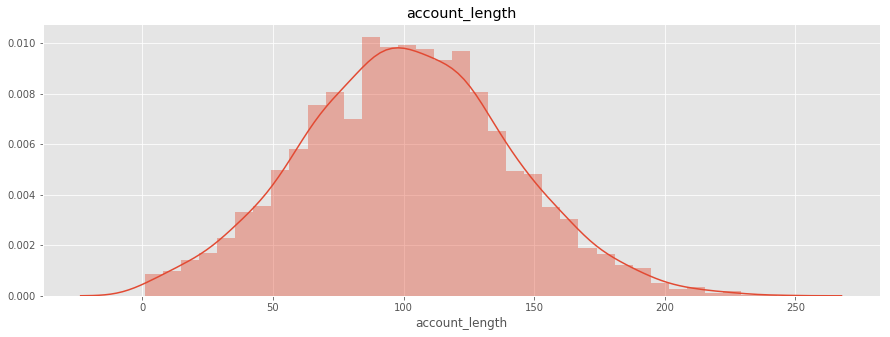

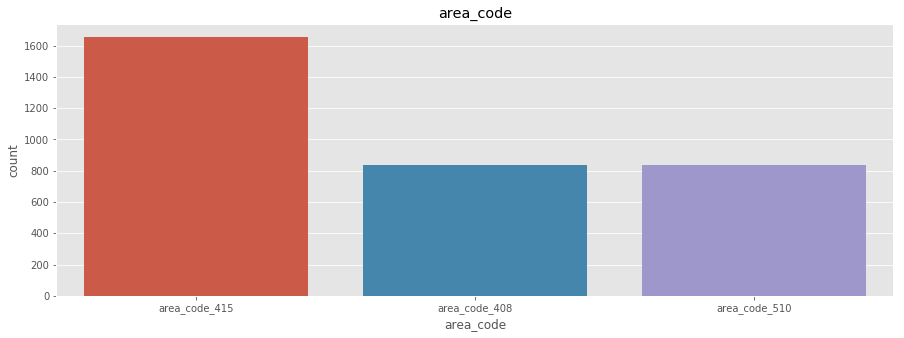

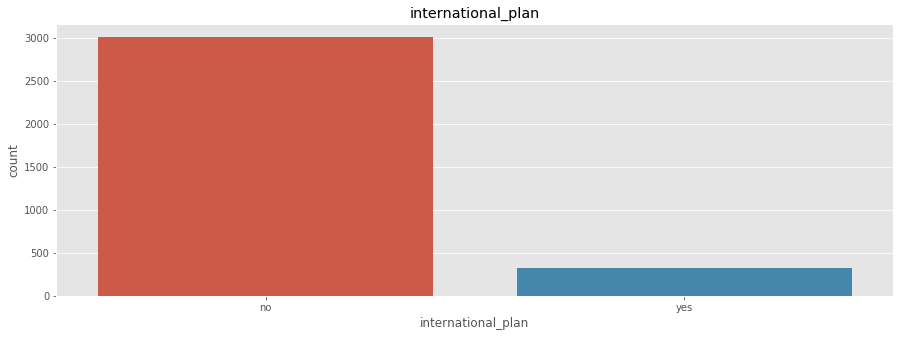

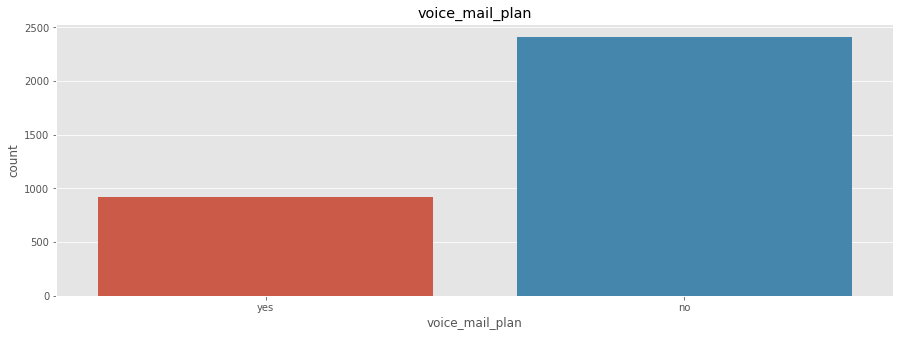

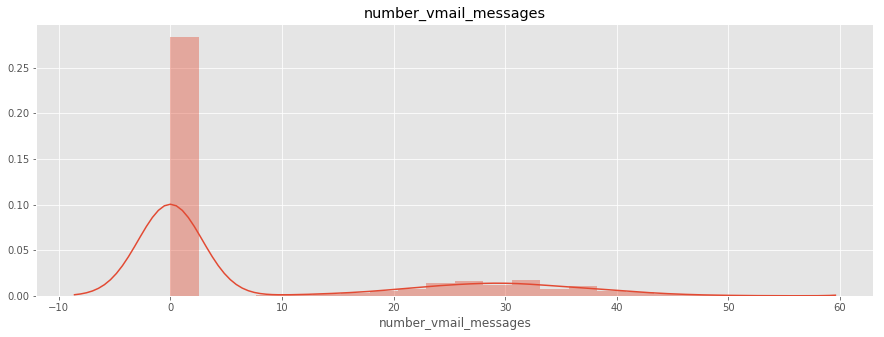

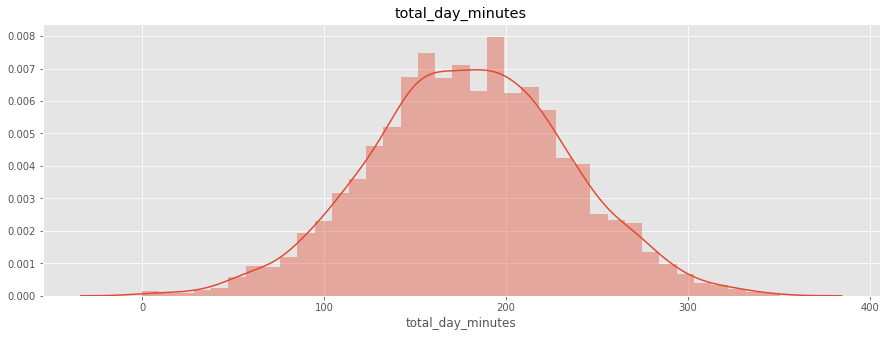

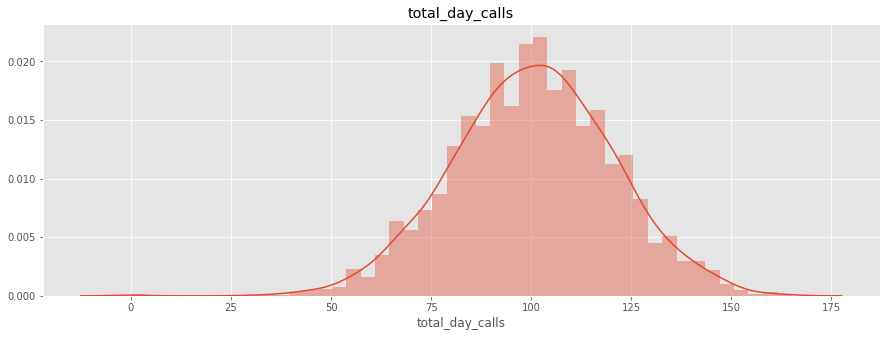

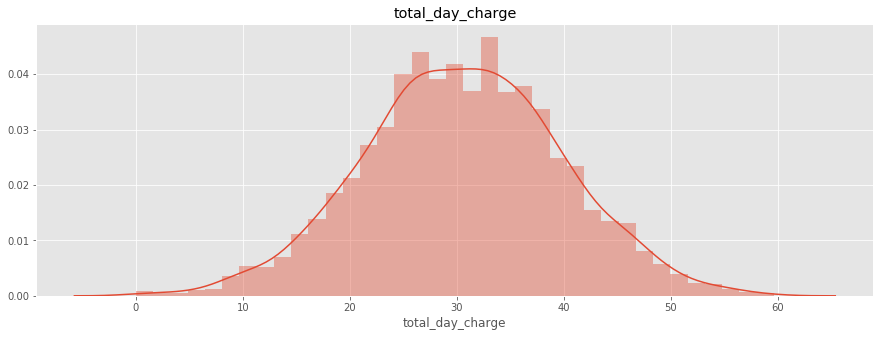

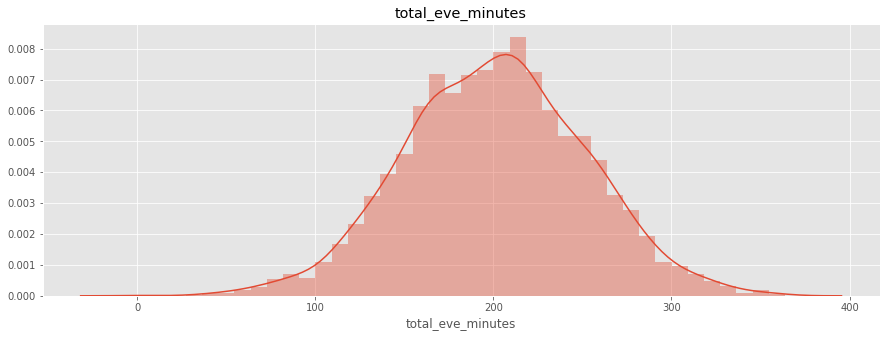

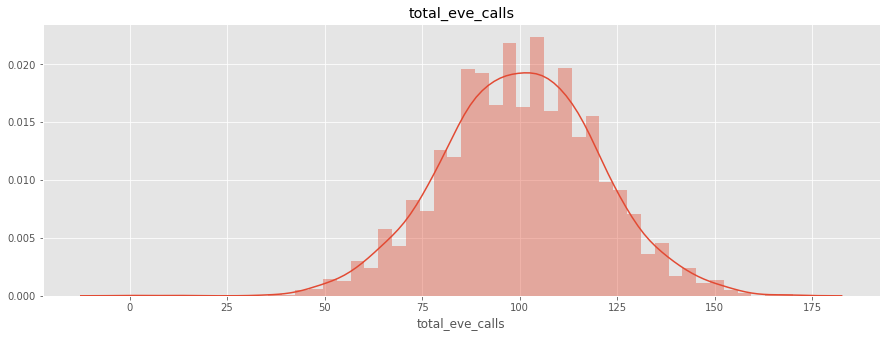

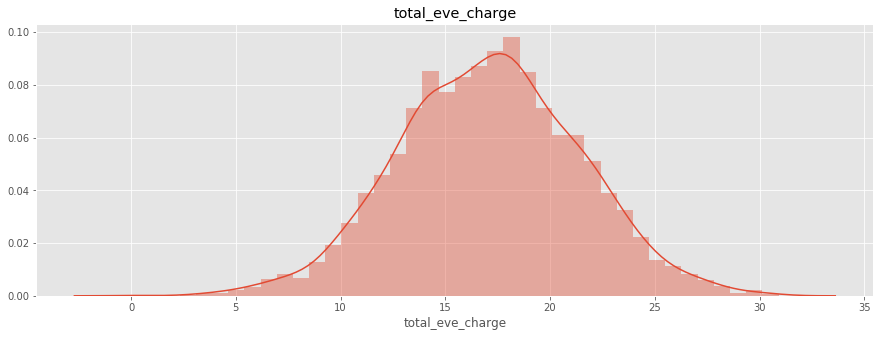

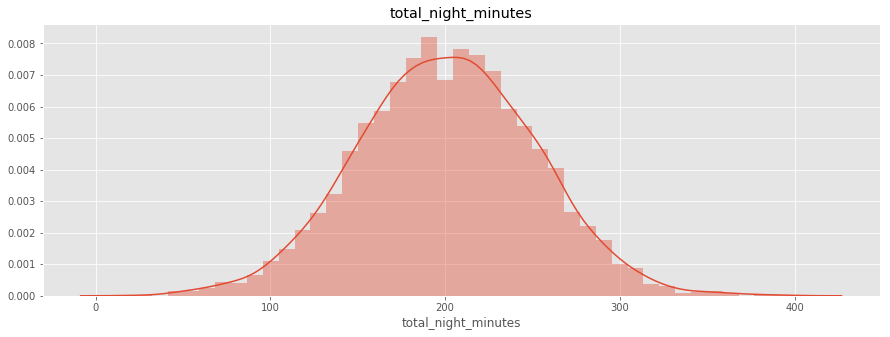

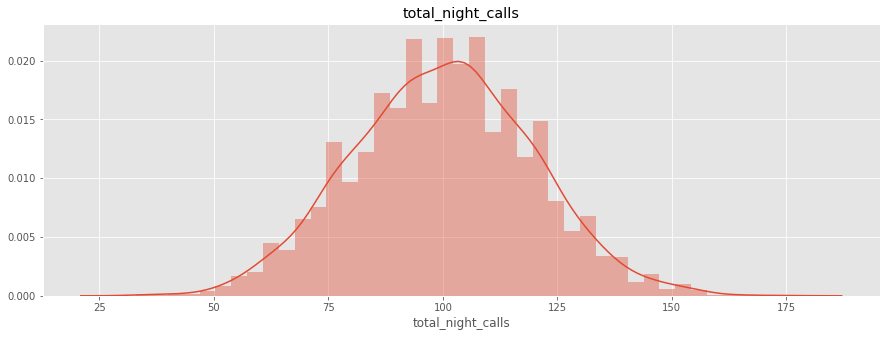

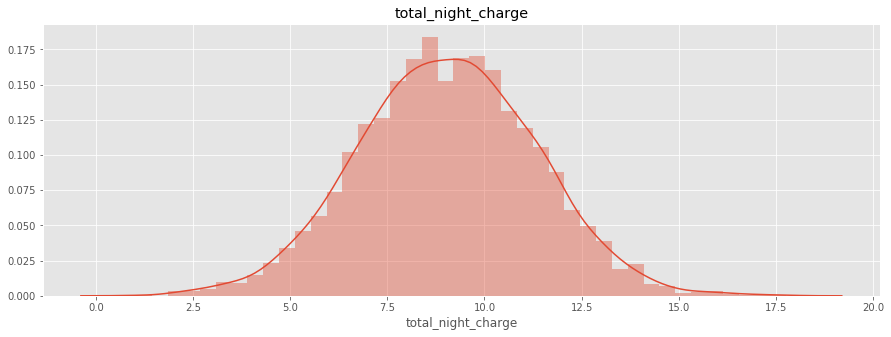

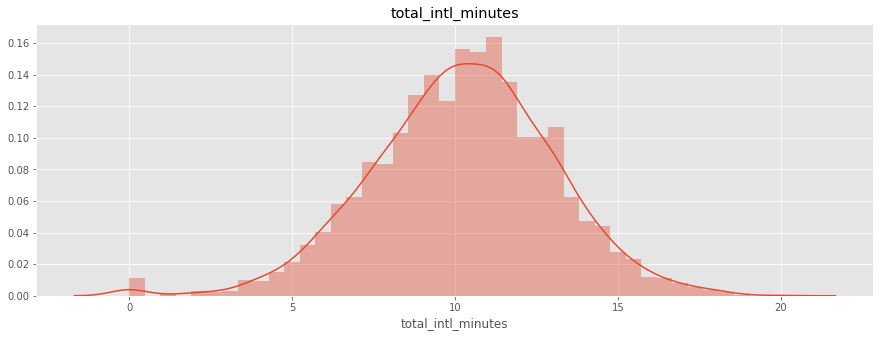

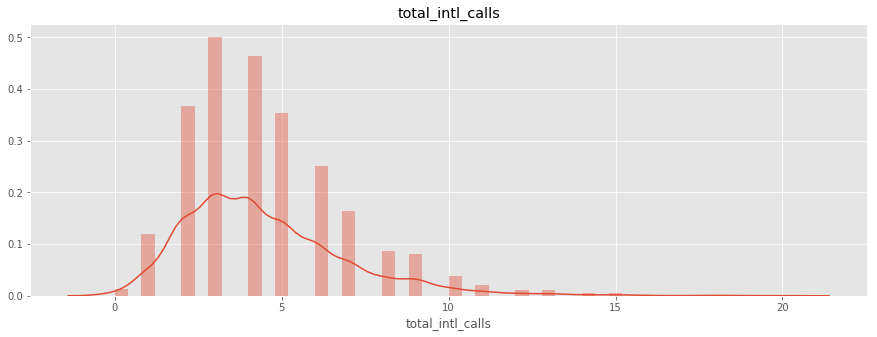

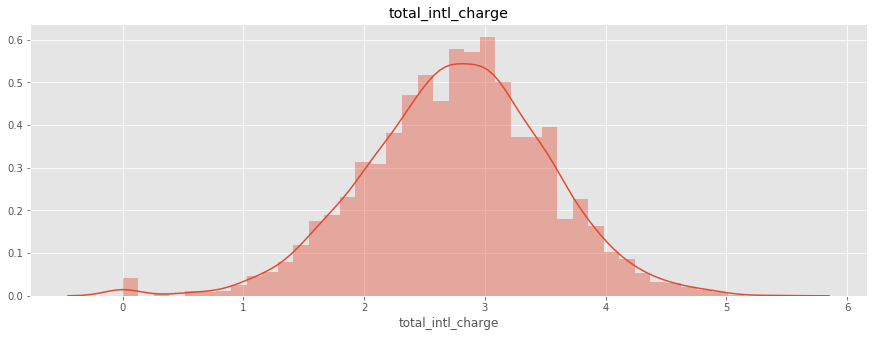

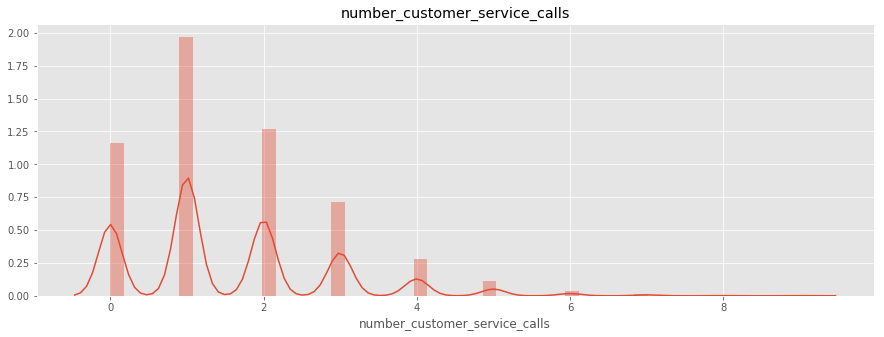

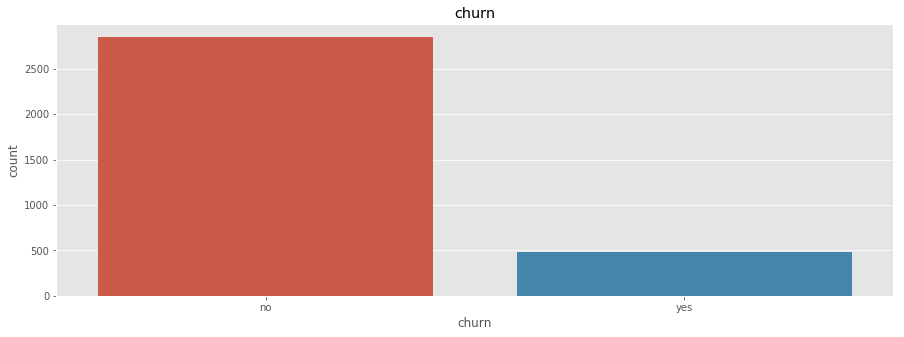

In [6]:
#graficamos el comportamiento distiutibo de las variables:
for colnames, series in df_train.iteritems():
    if series.dtypes ==object:
        plt.figure(figsize=(15,5))
        plt.title(colnames)
        sns.countplot(series)
        plt.show()
    else:
        plt.figure(figsize=(15,5))
        plt.title(colnames)
        sns.distplot(series)
        plt.show()
   

In [7]:
#podemos ver que hay variables enteras que hay variables enteras que tienen un comportamiento más parecido al normal, y otras que
# que necesitan alguna clase de reescalamiento. Las variables nominales poseen cierto desbalance

In [8]:
#binarizamos las variables, y reescalamos las variables enteras
df_train['international_plan']=np.where(df_train['international_plan']=='yes',1,0)
df_train['voice_mail_plan']=np.where(df_train['voice_mail_plan']=='yes',1,0)
df_train['churn']=np.where(df_train['churn']=='yes',1,0)

In [9]:
#obtenemos las dummies sobre state
df_train=pd.get_dummies(df_train,drop_first=True, columns=['state', 'area_code'])

In [10]:
df_train.shape

(3333, 70)

In [11]:
# Aplicamos logaritmo sobre las variables enteras que presentan alto sesgo: number_vmail_messages, total_intl_calls, number_customer_service_calls,
df_train['number_vmail_messages'] = np.log(df_train['number_vmail_messages'])
df_train['total_intl_calls'] = np.log(df_train['total_intl_calls'])
df_train['number_customer_service_calls'] = np.log(df_train['number_customer_service_calls'])

In [12]:
# Aplicamos las mismas transformaciones anteriores sobre el set de test
df_test['international_plan']=np.where(df_test['international_plan']=='yes',1,0)
df_test['voice_mail_plan']=np.where(df_test['voice_mail_plan']=='yes',1,0)
df_test['churn']=np.where(df_test['churn']=='yes',1,0)
###
df_test=pd.get_dummies(df_test,drop_first=True, columns=['state', 'area_code'])
###
df_test['number_vmail_messages'] = np.log(df_test['number_vmail_messages'])
df_test['total_intl_calls'] = np.log(df_test['total_intl_calls'])
df_test['number_customer_service_calls'] = np.log(df_test['number_customer_service_calls'])

In [13]:
df_test.shape

(1667, 70)

#### Ejercicio 2: Comparación de AdaBoost y Gradient Boosting

- Entrene los clasificadores AdaBoost y Gradient Boosting para mejorar su capacidad predictiva en la medida de lo posible. Para ello, implemente una búsqueda de grilla con las siguientesespecificaciones:
- Si el tiempo de computación es alto, puede implementar la búsqueda con 1 validación cruzada.
- Reporte las métricas para los mejores modelos.

In [21]:
#estandarizamos la base de datos
from sklearn.preprocessing import StandardScaler
df_train = df_train.dropna()
scaler = StandardScaler()
df_train =  pd.DataFrame(scaler.fit_transform(df_train), columns = df_train.columns)

ValueError: Input contains infinity or a value too large for dtype('float64').

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split


#estandarizamos la base de datos
#scaler = StandardScaler()
#df_train =  pd.DataFrame(scaler.fit_transform(df_train), columns = df_train.columns)

#dividimos los sets de datos
y_train = df_train['churn']
x_train = df_train.drop('churn',axis=1)
y_test = df_test['churn']
x_test = df_test.drop('churn',axis=1)

In [ ]:
#generamos la busqueda de grilla para Adaboost
Adaboost_model = GridSearchCV(AdaBoostClassifier(),{'learning_rate': [0.01, 0.1, 0.5],'n_estimators': [50, 100, 500, 1000, 2000]},cv=2)
Adaboost_model

In [ ]:
#generamos la busqueda de grilla para Gradient Boosting
GradientBoosting_model = GridSearchCV(GradientBoostingClassifier(),{'learning_rate': [0.01, 0.1,0.5],'n_estimators': [50, 100, 500, 1000, 2000],'subsample': [0.1,0.5,0.9]},cv=1)
GradientBoosting_model

In [ ]:
Adaboost_model.fit(x_train,y_train)

In [ ]:
Adaboost_model.fit(x_train,y_train)